In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.preprocessing import sequence

In [2]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=20000)


17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
x_train[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 15358,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,


In [4]:
y_train[1]

0

In [5]:
len(x_train[2])

141

In [6]:
x_train=sequence.pad_sequences(x_train,maxlen=150)
x_test=sequence.pad_sequences(x_test,maxlen=150)

In [7]:
len(x_train[2])

150

In [8]:
x_train[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    1,   14,
         47,    8,   30,   31,    7,    4,  249,  108,    7,    4, 5974,
         54,   61,  369,   13,   71,  149,   14,   22,  112,    4, 2401,
        311,   12,   16, 3711,   33,   75,   43, 1829,  296,    4,   86,
        320,   35,  534,   19,  263, 4821, 1301,    4, 1873,   33,   89,
         78,   12,   66,   16,    4,  360,    7,    4,   58,  316,  334,
         11,    4, 1716,   43,  645,  662,    8,  257,   85, 1200,   42,
       1228, 2578,   83,   68, 3912,   15,   36,  165, 1539,  278,   36,
         69,    2,  780,    8,  106,   14, 6905, 1338,   18,    6,   22,
         12,  215,   28,  610,   40,    6,   87,  326,   23, 2300,   21,
         23,   22,   12,  272,   40,   57,   31,   11,    4,   22,   47,
          6, 2307,   51,    9,  170,   23,  595,  116,  595, 1352,   13,
        191,   79,  638,   89,    2,   14,    9,    8,  106,  607,  624,
         35,  534,    6,  227,    7,  129,  113], d

In [9]:
x_train.shape

(25000, 150)

In [10]:
y_train.shape

(25000,)

In [11]:
model=Sequential()

In [12]:
model.add(Embedding(20000,64))
model.add(LSTM(64))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 1,313,089
Trainable params: 1,313,089
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(x_train,y_train,batch_size=100,epochs=10)

Epoch 1/10
250/250 [==============================] - 36s 136ms/step - loss: 0.5416 - accuracy: 0.6966
Epoch 2/10
250/250 [==============================] - 34s 137ms/step - loss: 0.2083 - accuracy: 0.9237
Epoch 3/10
250/250 [==============================] - 34s 137ms/step - loss: 0.1356 - accuracy: 0.9548
Epoch 4/10
250/250 [==============================] - 34s 136ms/step - loss: 0.0949 - accuracy: 0.9710
Epoch 5/10
250/250 [==============================] - 34s 136ms/step - loss: 0.0614 - accuracy: 0.9808
Epoch 6/10
250/250 [==============================] - 35s 138ms/step - loss: 0.0494 - accuracy: 0.9837
Epoch 7/10
250/250 [==============================] - 34s 136ms/step - loss: 0.0454 - accuracy: 0.9863
Epoch 8/10
250/250 [==============================] - 35s 139ms/step - loss: 0.0347 - accuracy: 0.9900
Epoch 9/10
250/250 [==============================] - 34s 137ms/step - loss: 0.0296 - accuracy: 0.9912
Epoch 10/10
250/250 [==============================] - 34s 136ms/step - l

In [16]:
score=model.evaluate(x_test,y_test)

782/782 [==============================] - 15s 19ms/step - loss: 0.7106 - accuracy: 0.8400


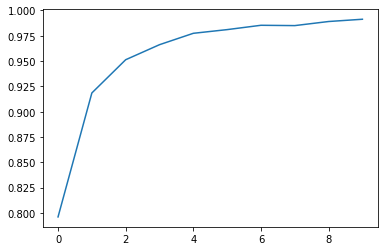

In [17]:
plt.plot(history.history['accuracy'])